<a href="https://colab.research.google.com/github/tmbern/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/Unit_2_Build_Week_NFL_score_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Do we want to predict win/loss? or do we want to predict points scored and allowed?

Probably start with predicting win/loss and then come back and try and predict a score

### Read in data and create a data frame

In [0]:
import pandas as pd

In [0]:
url = 'https://raw.githubusercontent.com/tmbern/Data-For-Unit-2-Build/master/NFL_boxscores_season_16_19.csv'
df = pd.read_csv(url, index_col=0)

In [363]:
print(df.shape)
df.head()

(2136, 39)


,boxscore_index,date,datetime,day,extra_points_attempted,extra_points_made,field_goals_attempted,field_goals_made,fourth_down_attempts,fourth_down_conversions,interceptions,location,opponent_abbr,opponent_name,overtime,pass_attempts,pass_completion_rate,pass_completions,pass_touchdowns,pass_yards,pass_yards_per_attempt,points_allowed,points_scored,punt_yards,punts,quarterback_rating,result,rush_attempts,rush_touchdowns,rush_yards,rush_yards_per_attempt,third_down_attempts,third_down_conversions,time_of_possession,times_sacked,type,week,yards_lost_from_sacks,Team
201909080mia,201909080mia,8-Sep,9/8/2019,Sun,8,8,1,1,2,2,0,Away,MIA,Miami Dolphins,False,26,88.5,23,6,378,14.6,10,59,56,1,158.3,Win,46,2,265,5.8,11,7,40:07:00,1,Reg,1,1,Baltimore Ravens
201909150rav,201909150rav,15-Sep,9/15/2019,Sun,2,2,3,3,1,0,0,Home,CRD,Arizona Cardinals,False,37,64.9,24,2,258,7.4,17,23,129,3,103.2,Win,33,0,182,5.5,14,7,37:38:00,2,Reg,2,14,Baltimore Ravens
201909220kan,201909220kan,22-Sep,9/22/2019,Sun,1,1,1,1,4,3,0,Away,KAN,Kansas City Chiefs,False,43,51.2,22,0,249,6.2,33,28,153,3,68.8,Loss,32,4,203,6.3,13,5,32:44:00,3,Reg,3,18,Baltimore Ravens
201909290rav,201909290rav,29-Sep,9/29/2019,Sun,2,2,1,1,2,1,2,Home,CLE,Cleveland Browns,False,34,70.6,24,3,222,7.3,40,25,131,3,93.0,Loss,29,0,173,6.0,10,4,29:43:00,4,Reg,4,25,Baltimore Ravens
201910060pit,201910060pit,6-Oct,10/6/2019,Sun,2,2,4,4,1,1,3,Away,PIT,Pittsburgh Steelers,True,28,67.9,19,1,139,5.8,23,26,155,3,51.6,Win,40,1,138,3.5,15,6,39:00:00,5,Reg,5,22,Baltimore Ravens


In [364]:
# reset the index because the boxscore_index has duplicates which can cause problems in 
# cleaning and other merging functions. 
# once we reset the index we can drop the duplicated boxscore_index column.
df = df.rename_axis('drop').reset_index().drop(labels='drop', axis=1)
print(df.shape)
df.head()

(2136, 39)


,boxscore_index,date,datetime,day,extra_points_attempted,extra_points_made,field_goals_attempted,field_goals_made,fourth_down_attempts,fourth_down_conversions,interceptions,location,opponent_abbr,opponent_name,overtime,pass_attempts,pass_completion_rate,pass_completions,pass_touchdowns,pass_yards,pass_yards_per_attempt,points_allowed,points_scored,punt_yards,punts,quarterback_rating,result,rush_attempts,rush_touchdowns,rush_yards,rush_yards_per_attempt,third_down_attempts,third_down_conversions,time_of_possession,times_sacked,type,week,yards_lost_from_sacks,Team
0,201909080mia,8-Sep,9/8/2019,Sun,8,8,1,1,2,2,0,Away,MIA,Miami Dolphins,False,26,88.5,23,6,378,14.6,10,59,56,1,158.3,Win,46,2,265,5.8,11,7,40:07:00,1,Reg,1,1,Baltimore Ravens
1,201909150rav,15-Sep,9/15/2019,Sun,2,2,3,3,1,0,0,Home,CRD,Arizona Cardinals,False,37,64.9,24,2,258,7.4,17,23,129,3,103.2,Win,33,0,182,5.5,14,7,37:38:00,2,Reg,2,14,Baltimore Ravens
2,201909220kan,22-Sep,9/22/2019,Sun,1,1,1,1,4,3,0,Away,KAN,Kansas City Chiefs,False,43,51.2,22,0,249,6.2,33,28,153,3,68.8,Loss,32,4,203,6.3,13,5,32:44:00,3,Reg,3,18,Baltimore Ravens
3,201909290rav,29-Sep,9/29/2019,Sun,2,2,1,1,2,1,2,Home,CLE,Cleveland Browns,False,34,70.6,24,3,222,7.3,40,25,131,3,93.0,Loss,29,0,173,6.0,10,4,29:43:00,4,Reg,4,25,Baltimore Ravens
4,201910060pit,6-Oct,10/6/2019,Sun,2,2,4,4,1,1,3,Away,PIT,Pittsburgh Steelers,True,28,67.9,19,1,139,5.8,23,26,155,3,51.6,Win,40,1,138,3.5,15,6,39:00:00,5,Reg,5,22,Baltimore Ravens


Columns are ordered all over the place. Want to reorder them so its in a better format to visualize when exploring data

In [0]:
# reordered state that we want the columns in.
reordered_cols = ['boxscore_index', 'date', 'datetime', 'day', 'type', 'week', 'Team',
                  'location', 'opponent_abbr', 'opponent_name', 'result', 'overtime',
                  'points_scored', 'points_allowed', 'pass_attempts', 'pass_completions',
                  'pass_completion_rate', 'pass_yards', 'pass_yards_per_attempt',
                  'pass_touchdowns', 'interceptions', 'quarterback_rating', 'times_sacked',
                  'yards_lost_from_sacks', 'rush_attempts', 'rush_yards', 'rush_yards_per_attempt',
                  'rush_touchdowns', 'extra_points_attempted', 'extra_points_made',
                  'field_goals_attempted', 'field_goals_made', 'fourth_down_attempts',
                  'fourth_down_conversions', 'third_down_attempts', 'third_down_conversions',
                  'punts', 'punt_yards', 'time_of_possession']

In [366]:
#pass the reordered columns into the dataframe
df = df[reordered_cols]

#make sure that we didnt lose any dimensions to our dataset. 
print(df.shape)
df.head()

(2136, 39)


,boxscore_index,date,datetime,day,type,week,Team,location,opponent_abbr,opponent_name,result,overtime,points_scored,points_allowed,pass_attempts,pass_completions,pass_completion_rate,pass_yards,pass_yards_per_attempt,pass_touchdowns,interceptions,quarterback_rating,times_sacked,yards_lost_from_sacks,rush_attempts,rush_yards,rush_yards_per_attempt,rush_touchdowns,extra_points_attempted,extra_points_made,field_goals_attempted,field_goals_made,fourth_down_attempts,fourth_down_conversions,third_down_attempts,third_down_conversions,punts,punt_yards,time_of_possession
0,201909080mia,8-Sep,9/8/2019,Sun,Reg,1,Baltimore Ravens,Away,MIA,Miami Dolphins,Win,False,59,10,26,23,88.5,378,14.6,6,0,158.3,1,1,46,265,5.8,2,8,8,1,1,2,2,11,7,1,56,40:07:00
1,201909150rav,15-Sep,9/15/2019,Sun,Reg,2,Baltimore Ravens,Home,CRD,Arizona Cardinals,Win,False,23,17,37,24,64.9,258,7.4,2,0,103.2,2,14,33,182,5.5,0,2,2,3,3,1,0,14,7,3,129,37:38:00
2,201909220kan,22-Sep,9/22/2019,Sun,Reg,3,Baltimore Ravens,Away,KAN,Kansas City Chiefs,Loss,False,28,33,43,22,51.2,249,6.2,0,0,68.8,3,18,32,203,6.3,4,1,1,1,1,4,3,13,5,3,153,32:44:00
3,201909290rav,29-Sep,9/29/2019,Sun,Reg,4,Baltimore Ravens,Home,CLE,Cleveland Browns,Loss,False,25,40,34,24,70.6,222,7.3,3,2,93.0,4,25,29,173,6.0,0,2,2,1,1,2,1,10,4,3,131,29:43:00
4,201910060pit,6-Oct,10/6/2019,Sun,Reg,5,Baltimore Ravens,Away,PIT,Pittsburgh Steelers,Win,True,26,23,28,19,67.9,139,5.8,1,3,51.6,5,22,40,138,3.5,1,2,2,4,4,1,1,15,6,3,155,39:00:00


### Exploratory Data and Analysis

In [367]:
# see what type each of the variables are. 
df.dtypes

boxscore_index              object
date                        object
datetime                    object
day                         object
type                        object
week                         int64
Team                        object
location                    object
opponent_abbr               object
opponent_name               object
result                      object
overtime                      bool
points_scored                int64
points_allowed               int64
pass_attempts                int64
pass_completions             int64
pass_completion_rate       float64
pass_yards                   int64
pass_yards_per_attempt     float64
pass_touchdowns              int64
interceptions                int64
quarterback_rating         float64
times_sacked                 int64
yards_lost_from_sacks        int64
rush_attempts                int64
rush_yards                   int64
rush_yards_per_attempt     float64
rush_touchdowns              int64
extra_points_attempt

* a couple that look like they will need updating will be the date time...We can use the date time to create a new column for day, month, year, and we can drop the date column.  
* Week is currently an integer...that may cause issues in predicting scores. should look at that feature and see if the week that a team plays has any impact on the points it scores. Maybe early in the season they dont score as much? If so how can we make that a better indicator than 1-17?  
*time_of_possission - currently an object. we will want to format that into minutes, and seconds, or maybe just seconds. so that should be an integer or float.   



There will need to be some clean up on some of the dates. Post season dates are in the wrong year. e.g. Kansas City is showing playing this years post season in 2019 rather than 2020. that appears to be the case for all post season games.

In [0]:
df['datetime'] = pd.to_datetime(df['datetime'], infer_datetime_format=True)

In [369]:
df.head()

,boxscore_index,date,datetime,day,type,week,Team,location,opponent_abbr,opponent_name,result,overtime,points_scored,points_allowed,pass_attempts,pass_completions,pass_completion_rate,pass_yards,pass_yards_per_attempt,pass_touchdowns,interceptions,quarterback_rating,times_sacked,yards_lost_from_sacks,rush_attempts,rush_yards,rush_yards_per_attempt,rush_touchdowns,extra_points_attempted,extra_points_made,field_goals_attempted,field_goals_made,fourth_down_attempts,fourth_down_conversions,third_down_attempts,third_down_conversions,punts,punt_yards,time_of_possession
0,201909080mia,8-Sep,2019-09-08,Sun,Reg,1,Baltimore Ravens,Away,MIA,Miami Dolphins,Win,False,59,10,26,23,88.5,378,14.6,6,0,158.3,1,1,46,265,5.8,2,8,8,1,1,2,2,11,7,1,56,40:07:00
1,201909150rav,15-Sep,2019-09-15,Sun,Reg,2,Baltimore Ravens,Home,CRD,Arizona Cardinals,Win,False,23,17,37,24,64.9,258,7.4,2,0,103.2,2,14,33,182,5.5,0,2,2,3,3,1,0,14,7,3,129,37:38:00
2,201909220kan,22-Sep,2019-09-22,Sun,Reg,3,Baltimore Ravens,Away,KAN,Kansas City Chiefs,Loss,False,28,33,43,22,51.2,249,6.2,0,0,68.8,3,18,32,203,6.3,4,1,1,1,1,4,3,13,5,3,153,32:44:00
3,201909290rav,29-Sep,2019-09-29,Sun,Reg,4,Baltimore Ravens,Home,CLE,Cleveland Browns,Loss,False,25,40,34,24,70.6,222,7.3,3,2,93.0,4,25,29,173,6.0,0,2,2,1,1,2,1,10,4,3,131,29:43:00
4,201910060pit,6-Oct,2019-10-06,Sun,Reg,5,Baltimore Ravens,Away,PIT,Pittsburgh Steelers,Win,True,26,23,28,19,67.9,139,5.8,1,3,51.6,5,22,40,138,3.5,1,2,2,4,4,1,1,15,6,3,155,39:00:00


In [370]:
df['Team'].value_counts()

New England Patriots    74
Kansas City Chiefs      71
Philadelphia Eagles     70
Houston Texans          69
Tennessee Titans        69
Seattle Seahawks        69
Atlanta Falcons         69
Green Bay Packers       69
New Orleans Saints      69
Los Angeles Rams        68
Minnesota Vikings       68
Pittsburgh Steelers     68
Jacksonville Jaguars    67
San Francisco 49ers     67
Dallas Cowboys          67
Baltimore Ravens        66
Buffalo Bills           66
Indianapolis Colts      66
Carolina Panthers       65
Miami Dolphins          65
New York Giants         65
Oakland Raiders         65
Chicago Bears           65
Detroit Lions           65
Tampa Bay Buccaneers    64
Cleveland Browns        64
Washington Redskins     64
Arizona Cardinals       64
New York Jets           64
Denver Broncos          64
Cincinnati Bengals      64
Los Angeles Chargers    50
San Diego Chargers      16
Name: Team, dtype: int64

In [371]:
 (df['Team'] == 'New England Patriots').value_counts()

False    2062
True       74
Name: Team, dtype: int64

In [372]:
(df['datetime'] >= '2019-07-01').value_counts()

False    1624
True      512
Name: datetime, dtype: int64

In [373]:
# what are are 'type' data points
df['type'].value_counts()

Reg     2048
Post      88
Name: type, dtype: int64

In [374]:
# how many games were played in January and February that were postseason)

(((df['datetime'].dt.month == 1) | (df['datetime'].dt.month == 2)) & (df['type'] == 'Post')).value_counts()

False    2048
True       88
dtype: int64

In [375]:
# how many games were played in January and February that were not postseason ('Post')

(((df['datetime'].dt.month == 1) | (df['datetime'].dt.month == 2)) & (df['type'] == 'Reg')).value_counts()

False    2104
True       32
dtype: int64

In [376]:
# view that as a dataframe so we can see those games. 

Game_check = df[(((df['datetime'].dt.month == 1) | (df['datetime'].dt.month == 2)))]
Game_check.shape

(120, 39)

In [377]:
Game_check.head(120)

,boxscore_index,date,datetime,day,type,week,Team,location,opponent_abbr,opponent_name,result,overtime,points_scored,points_allowed,pass_attempts,pass_completions,pass_completion_rate,pass_yards,pass_yards_per_attempt,pass_touchdowns,interceptions,quarterback_rating,times_sacked,yards_lost_from_sacks,rush_attempts,rush_yards,rush_yards_per_attempt,rush_touchdowns,extra_points_attempted,extra_points_made,field_goals_attempted,field_goals_made,fourth_down_attempts,fourth_down_conversions,third_down_attempts,third_down_conversions,punts,punt_yards,time_of_possession
16,202001110rav,11-Jan,2019-01-11,Sat,Post,19,Baltimore Ravens,Home,OTI,Tennessee Titans,Loss,False,12,28,59,31,52.5,345,6.2,1,2,61.8,4,20,29,185,6.4,0,0,0,2,2,4,0,18,11,1,44,32:06:00
33,202001110sfo,11-Jan,2019-01-11,Sat,Post,19,San Francisco 49ers,Home,MIN,Minnesota Vikings,Win,False,27,10,19,11,57.9,122,6.9,1,1,72.7,2,9,47,186,4.0,2,3,3,2,2,1,0,12,5,4,186,38:27:00
34,202001190sfo,19-Jan,2019-01-19,Sun,Post,20,San Francisco 49ers,Home,GNB,Green Bay Packers,Win,False,37,20,8,6,75.0,69,9.6,0,0,100.5,1,8,42,285,6.8,4,4,4,3,3,0,0,10,4,2,77,28:47:00
35,202002020kan,2-Feb,2019-02-02,Sun,Post,21,San Francisco 49ers,Neutral,KAN,Kansas City Chiefs,Loss,False,20,31,31,20,64.5,210,7.1,1,2,67.9,1,9,22,141,6.4,1,2,2,2,2,1,0,8,3,2,86,26:47:00
68,202001050nor,5-Jan,2019-01-05,Sun,Post,18,New Orleans Saints,Home,MIN,Minnesota Vikings,Loss,True,20,26,34,27,79.4,227,7.6,1,1,92.0,3,31,17,97,5.7,1,2,2,3,2,0,0,11,4,5,229,27:24:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2071,201701010den,1-Jan,2016-01-01,Sun,Reg,17,Denver Broncos,Home,RAI,Oakland Raiders,Win,False,24,6,27,17,63.0,206,7.6,2,1,95.6,0,0,40,143,3.6,1,3,3,2,1,3,1,15,5,5,224,35:25:00
2087,201701010min,1-Jan,2016-01-01,Sun,Reg,17,Chicago Bears,Away,MIN,Minnesota Vikings,Loss,False,10,38,20,13,65.0,140,7.5,1,2,62.5,2,9,37,183,4.9,0,1,1,1,1,2,1,9,2,3,143,29:48:00
2103,201701010cin,1-Jan,2016-01-01,Sun,Reg,17,Cincinnati Bengals,Home,RAV,Baltimore Ravens,Win,False,27,10,28,18,64.3,218,8.1,1,0,100.0,1,8,38,153,4.0,2,3,3,2,2,0,0,8,1,5,247,30:42:00
2119,201701010nyj,1-Jan,2016-01-01,Sun,Reg,17,New York Jets,Home,BUF,Buffalo Bills,Win,False,30,10,30,20,66.7,202,7.0,2,0,107.9,1,8,30,127,4.2,0,3,3,3,3,2,0,13,4,5,231,31:27:00


If we look at the date time vs the boxscore index we see that it lags a year. The date in the 'datetime' column needs to be a year later. For a sanity check i looked up the ravens vs bengals game on 01/01/2016 and it didnt exist. However a 01/01/2017 game did exist. That is consistent with the boxscore_index showing 2017. for some reason the dates in Jan and Feb are incorrect. 

In [0]:
%%capture
!pip install datedelta


In [0]:
import datetime
import datedelta
from dateutil.relativedelta import relativedelta

In [0]:
# # If the game is played in january or february we need to add one year to the date.
# # Otherwise the datetime that is used in the dataset is correct


def correct_date_for_postseason(X):
  # We need to add a year to each  game that is played in January or 
  # February. This will make each year in the datetime match the year in the Boxscore_index.
  condition = ((X['datetime'].dt.month == 1) | (X['datetime'].dt.month == 2)) 

  X = X.copy()

  X.loc[condition, 'corrected_datetime'] = X['datetime'] + pd.DateOffset(years=1)
  X.loc[~condition, 'corrected_datetime'] = X['datetime']

  return X

In [381]:
df = correct_date_for_postseason(df) 
df.shape

(2136, 40)

In [382]:
# reordered state that we want the columns in. but we can leave out the original 'datetime'
# column as that is just unclean data now that isnt usable. 

reordered_cols = ['boxscore_index', 'date', 'corrected_datetime', 'day', 'type', 'week', 'Team',
                  'location', 'opponent_abbr', 'opponent_name', 'result', 'overtime',
                  'points_scored', 'points_allowed', 'pass_attempts', 'pass_completions',
                  'pass_completion_rate', 'pass_yards', 'pass_yards_per_attempt',
                  'pass_touchdowns', 'interceptions', 'quarterback_rating', 'times_sacked',
                  'yards_lost_from_sacks', 'rush_attempts', 'rush_yards', 'rush_yards_per_attempt',
                  'rush_touchdowns', 'extra_points_attempted', 'extra_points_made',
                  'field_goals_attempted', 'field_goals_made', 'fourth_down_attempts',
                  'fourth_down_conversions', 'third_down_attempts', 'third_down_conversions',
                  'punts', 'punt_yards', 'time_of_possession']

#pass the reordered columns into the dataframe
df = df[reordered_cols]

#make sure that we didnt lose any dimensions to our dataset. 
print(df.shape)
df.head()


(2136, 39)


,boxscore_index,date,corrected_datetime,day,type,week,Team,location,opponent_abbr,opponent_name,result,overtime,points_scored,points_allowed,pass_attempts,pass_completions,pass_completion_rate,pass_yards,pass_yards_per_attempt,pass_touchdowns,interceptions,quarterback_rating,times_sacked,yards_lost_from_sacks,rush_attempts,rush_yards,rush_yards_per_attempt,rush_touchdowns,extra_points_attempted,extra_points_made,field_goals_attempted,field_goals_made,fourth_down_attempts,fourth_down_conversions,third_down_attempts,third_down_conversions,punts,punt_yards,time_of_possession
0,201909080mia,8-Sep,2019-09-08,Sun,Reg,1,Baltimore Ravens,Away,MIA,Miami Dolphins,Win,False,59,10,26,23,88.5,378,14.6,6,0,158.3,1,1,46,265,5.8,2,8,8,1,1,2,2,11,7,1,56,40:07:00
1,201909150rav,15-Sep,2019-09-15,Sun,Reg,2,Baltimore Ravens,Home,CRD,Arizona Cardinals,Win,False,23,17,37,24,64.9,258,7.4,2,0,103.2,2,14,33,182,5.5,0,2,2,3,3,1,0,14,7,3,129,37:38:00
2,201909220kan,22-Sep,2019-09-22,Sun,Reg,3,Baltimore Ravens,Away,KAN,Kansas City Chiefs,Loss,False,28,33,43,22,51.2,249,6.2,0,0,68.8,3,18,32,203,6.3,4,1,1,1,1,4,3,13,5,3,153,32:44:00
3,201909290rav,29-Sep,2019-09-29,Sun,Reg,4,Baltimore Ravens,Home,CLE,Cleveland Browns,Loss,False,25,40,34,24,70.6,222,7.3,3,2,93.0,4,25,29,173,6.0,0,2,2,1,1,2,1,10,4,3,131,29:43:00
4,201910060pit,6-Oct,2019-10-06,Sun,Reg,5,Baltimore Ravens,Away,PIT,Pittsburgh Steelers,Win,True,26,23,28,19,67.9,139,5.8,1,3,51.6,5,22,40,138,3.5,1,2,2,4,4,1,1,15,6,3,155,39:00:00


In [383]:
# lets look and see if the Patriots seasons look correct. If we look at anything after February of 2019
# we should see the full patriots season (regular and post) for the 2019-2020 season
pats_2019 =  df[((df['Team'] == 'New England Patriots') & (df['corrected_datetime'] >= '2019-03-01'))].reset_index(drop=True)
print(pats_2019.shape)
pats_2019.head(17)

(17, 39)


,boxscore_index,date,corrected_datetime,day,type,week,Team,location,opponent_abbr,opponent_name,result,overtime,points_scored,points_allowed,pass_attempts,pass_completions,pass_completion_rate,pass_yards,pass_yards_per_attempt,pass_touchdowns,interceptions,quarterback_rating,times_sacked,yards_lost_from_sacks,rush_attempts,rush_yards,rush_yards_per_attempt,rush_touchdowns,extra_points_attempted,extra_points_made,field_goals_attempted,field_goals_made,fourth_down_attempts,fourth_down_conversions,third_down_attempts,third_down_conversions,punts,punt_yards,time_of_possession
0,201909080nwe,8-Sep,2019-09-08,Sun,Reg,1,New England Patriots,Home,PIT,Pittsburgh Steelers,Win,False,33,3,37,25,67.6,366,10.1,3,0,126.6,1,7,29,99,3.4,0,3,3,4,4,0,0,14,7,3,123,32:33:00
1,201909150mia,15-Sep,2019-09-15,Sun,Reg,2,New England Patriots,Away,MIA,Miami Dolphins,Win,False,43,0,28,20,71.4,255,9.4,2,0,123.4,2,9,35,124,3.5,2,6,4,2,1,0,0,11,6,3,144,36:30:00
2,201909220nwe,22-Sep,2019-09-22,Sun,Reg,3,New England Patriots,Home,NYJ,New York Jets,Win,False,30,14,45,30,66.7,313,7.1,2,1,92.2,1,7,27,68,2.5,2,4,3,1,1,0,0,15,6,7,310,35:14:00
3,201909290buf,29-Sep,2019-09-29,Sun,Reg,4,New England Patriots,Away,BUF,Buffalo Bills,Win,False,16,10,39,18,46.2,150,3.8,0,1,45.9,0,0,23,74,3.2,1,2,1,1,1,0,0,18,5,9,435,27:20:00
4,201910060was,6-Oct,2019-10-06,Sun,Reg,5,New England Patriots,Away,WAS,Washington Redskins,Win,False,33,7,43,28,65.1,312,8.1,3,1,100.1,4,36,27,130,4.8,1,4,3,2,2,1,0,15,5,6,286,31:53:00
5,201910100nwe,10-Oct,2019-10-10,Thu,Reg,6,New England Patriots,Home,NYG,New York Giants,Win,False,35,14,41,31,75.6,313,8.1,0,1,86.7,3,21,34,114,3.4,3,5,5,1,0,2,0,13,6,3,122,39:36:00
6,201910210nyj,21-Oct,2019-10-21,Mon,Reg,7,New England Patriots,Away,NYJ,New York Jets,Win,False,33,0,45,31,68.9,249,5.5,1,1,80.7,0,0,34,74,2.2,3,4,4,1,1,1,1,16,7,7,261,38:27:00
7,201910270nwe,27-Oct,2019-10-27,Sun,Reg,8,New England Patriots,Home,CLE,Cleveland Browns,Win,False,27,13,36,20,55.6,239,7.2,2,0,94.6,3,20,27,79,2.9,0,3,3,4,2,2,2,16,5,5,227,32:15:00
8,201911030rav,3-Nov,2019-11-03,Sun,Reg,9,New England Patriots,Away,RAV,Baltimore Ravens,Loss,False,20,37,46,30,65.2,268,6.2,1,1,78.9,2,17,17,74,4.4,1,2,2,2,2,0,0,13,5,5,233,22:59
9,201911170phi,17-Nov,2019-11-17,Sun,Reg,11,New England Patriots,Away,PHI,Philadelphia Eagles,Win,False,17,10,48,27,56.3,224,4.8,1,0,75.3,1,7,22,74,3.4,0,0,0,3,3,0,0,16,5,8,381,28:25:00


### What is my target? 

* Points scored?  
* Points allowed?  
* Win/Loss?

If target is Points scored/allowed we will have a problem that is a regression

If target is Win/Loss we will have a problem that is a classification

###  How is your target distributed?

* Classification: How many classes? Are the classes imbalanced?  
* Regression: Is the target right-skewed? If so, you may want to log transform the target.

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt


In [385]:
# Classification of targetd distribution
# what is the majority class if we use win/loss? THis should be 50/50... or very close
# with the exceptions of tie games.

df['result'].value_counts(normalize=True)



Loss    0.497659
Win     0.497659
Tie     0.004682
Name: result, dtype: float64

As expected if we did a classification we wouldnt have an imbalanced class

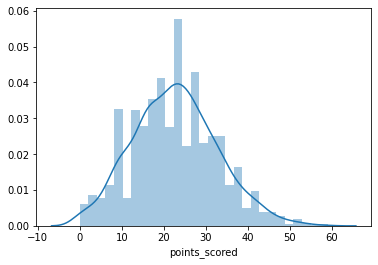

In [386]:
# what is the distribution of my target if Points scored is my target?

y=df['points_scored']

sns.distplot(y)
plt.show()

This is pretty close to normally distributed. 

### Choose your evaluation metric(s).
* Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?  
* Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?

In [387]:
df

,boxscore_index,date,corrected_datetime,day,type,week,Team,location,opponent_abbr,opponent_name,result,overtime,points_scored,points_allowed,pass_attempts,pass_completions,pass_completion_rate,pass_yards,pass_yards_per_attempt,pass_touchdowns,interceptions,quarterback_rating,times_sacked,yards_lost_from_sacks,rush_attempts,rush_yards,rush_yards_per_attempt,rush_touchdowns,extra_points_attempted,extra_points_made,field_goals_attempted,field_goals_made,fourth_down_attempts,fourth_down_conversions,third_down_attempts,third_down_conversions,punts,punt_yards,time_of_possession
0,201909080mia,8-Sep,2019-09-08,Sun,Reg,1,Baltimore Ravens,Away,MIA,Miami Dolphins,Win,False,59,10,26,23,88.5,378,14.6,6,0,158.3,1,1,46,265,5.8,2,8,8,1,1,2,2,11,7,1,56,40:07:00
1,201909150rav,15-Sep,2019-09-15,Sun,Reg,2,Baltimore Ravens,Home,CRD,Arizona Cardinals,Win,False,23,17,37,24,64.9,258,7.4,2,0,103.2,2,14,33,182,5.5,0,2,2,3,3,1,0,14,7,3,129,37:38:00
2,201909220kan,22-Sep,2019-09-22,Sun,Reg,3,Baltimore Ravens,Away,KAN,Kansas City Chiefs,Loss,False,28,33,43,22,51.2,249,6.2,0,0,68.8,3,18,32,203,6.3,4,1,1,1,1,4,3,13,5,3,153,32:44:00
3,201909290rav,29-Sep,2019-09-29,Sun,Reg,4,Baltimore Ravens,Home,CLE,Cleveland Browns,Loss,False,25,40,34,24,70.6,222,7.3,3,2,93.0,4,25,29,173,6.0,0,2,2,1,1,2,1,10,4,3,131,29:43:00
4,201910060pit,6-Oct,2019-10-06,Sun,Reg,5,Baltimore Ravens,Away,PIT,Pittsburgh Steelers,Win,True,26,23,28,19,67.9,139,5.8,1,3,51.6,5,22,40,138,3.5,1,2,2,4,4,1,1,15,6,3,155,39:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,201612040crd,4-Dec,2016-12-04,Sun,Reg,13,Washington Redskins,Away,CRD,Arizona Cardinals,Loss,False,23,31,37,21,56.8,246,7.3,1,1,74.8,2,25,18,87,4.8,1,2,2,3,3,0,0,11,5,2,89,26:14:00
2132,201612110phi,11-Dec,2016-12-11,Sun,Reg,14,Washington Redskins,Away,PHI,Philadelphia Eagles,Win,False,27,22,21,14,66.7,227,11.1,2,1,114.6,2,7,23,107,4.7,2,3,3,1,0,1,1,7,2,3,141,23:22
2133,201612190was,19-Dec,2016-12-19,Mon,Reg,15,Washington Redskins,Home,CAR,Carolina Panthers,Loss,False,15,26,47,32,68.1,306,6.7,0,1,77.1,1,9,13,29,2.2,1,1,0,3,3,1,1,12,2,6,286,25:21:00
2134,201612240chi,24-Dec,2016-12-24,Sat,Reg,16,Washington Redskins,Away,CHI,Chicago Bears,Win,False,41,21,29,18,62.1,270,9.3,1,0,104.1,0,0,35,208,5.9,4,5,5,2,2,1,0,13,8,2,83,32:35:00


In [388]:
df.dtypes

boxscore_index                     object
date                               object
corrected_datetime         datetime64[ns]
day                                object
type                               object
week                                int64
Team                               object
location                           object
opponent_abbr                      object
opponent_name                      object
result                             object
overtime                             bool
points_scored                       int64
points_allowed                      int64
pass_attempts                       int64
pass_completions                    int64
pass_completion_rate              float64
pass_yards                          int64
pass_yards_per_attempt            float64
pass_touchdowns                     int64
interceptions                       int64
quarterback_rating                float64
times_sacked                        int64
yards_lost_from_sacks             

In [0]:
# Need to change the week from an int to an object

df['week'] = df['week'].astype('category')


In [390]:
df.dtypes

boxscore_index                     object
date                               object
corrected_datetime         datetime64[ns]
day                                object
type                               object
week                             category
Team                               object
location                           object
opponent_abbr                      object
opponent_name                      object
result                             object
overtime                             bool
points_scored                       int64
points_allowed                      int64
pass_attempts                       int64
pass_completions                    int64
pass_completion_rate              float64
pass_yards                          int64
pass_yards_per_attempt            float64
pass_touchdowns                     int64
interceptions                       int64
quarterback_rating                float64
times_sacked                        int64
yards_lost_from_sacks             

In [355]:
# time_of_possession needs to be converted to an integer and not an object.
# An issue is that the length is different for them. Some have milliseconds showns as 00
# while others leave that item blank. May have to us a for loop to change that. 

df['time_of_possession'].str.len().value_counts()

8    1956
5     180
Name: time_of_possession, dtype: int64

In [0]:
df[['top_minutes', 'top_seconds', 'top_miliseconds']] = df['time_of_possession'].str.split(':', n=2, expand=True) 

In [394]:
df.head()

,boxscore_index,date,corrected_datetime,day,type,week,Team,location,opponent_abbr,opponent_name,result,overtime,points_scored,points_allowed,pass_attempts,pass_completions,pass_completion_rate,pass_yards,pass_yards_per_attempt,pass_touchdowns,interceptions,quarterback_rating,times_sacked,yards_lost_from_sacks,rush_attempts,rush_yards,rush_yards_per_attempt,rush_touchdowns,extra_points_attempted,extra_points_made,field_goals_attempted,field_goals_made,fourth_down_attempts,fourth_down_conversions,third_down_attempts,third_down_conversions,punts,punt_yards,time_of_possession,top_minutes,top_seconds,top_miliseconds
0,201909080mia,8-Sep,2019-09-08,Sun,Reg,1,Baltimore Ravens,Away,MIA,Miami Dolphins,Win,False,59,10,26,23,88.5,378,14.6,6,0,158.3,1,1,46,265,5.8,2,8,8,1,1,2,2,11,7,1,56,40:07:00,40,07,00
1,201909150rav,15-Sep,2019-09-15,Sun,Reg,2,Baltimore Ravens,Home,CRD,Arizona Cardinals,Win,False,23,17,37,24,64.9,258,7.4,2,0,103.2,2,14,33,182,5.5,0,2,2,3,3,1,0,14,7,3,129,37:38:00,37,38,00
2,201909220kan,22-Sep,2019-09-22,Sun,Reg,3,Baltimore Ravens,Away,KAN,Kansas City Chiefs,Loss,False,28,33,43,22,51.2,249,6.2,0,0,68.8,3,18,32,203,6.3,4,1,1,1,1,4,3,13,5,3,153,32:44:00,32,44,00
3,201909290rav,29-Sep,2019-09-29,Sun,Reg,4,Baltimore Ravens,Home,CLE,Cleveland Browns,Loss,False,25,40,34,24,70.6,222,7.3,3,2,93.0,4,25,29,173,6.0,0,2,2,1,1,2,1,10,4,3,131,29:43:00,29,43,00
4,201910060pit,6-Oct,2019-10-06,Sun,Reg,5,Baltimore Ravens,Away,PIT,Pittsburgh Steelers,Win,True,26,23,28,19,67.9,139,5.8,1,3,51.6,5,22,40,138,3.5,1,2,2,4,4,1,1,15,6,3,155,39:00:00,39,00,00


In [396]:
print(df['top_miliseconds'].value_counts())
print(df['top_miliseconds'].isnull().sum())


00    1956
Name: top_miliseconds, dtype: int64
180


In [0]:
target = 'points_scored'
features_to_drop = ['boxscore_index', 'date', 'corrected_datetime', 'opponent_abbr', 'result',
                    'points_allowed']

In [244]:
# correlation table for the dataset

df.corr()

,week,overtime,points_scored,points_allowed,pass_attempts,pass_completions,pass_completion_rate,pass_yards,pass_yards_per_attempt,pass_touchdowns,interceptions,quarterback_rating,times_sacked,yards_lost_from_sacks,rush_attempts,rush_yards,rush_yards_per_attempt,rush_touchdowns,extra_points_attempted,extra_points_made,field_goals_attempted,field_goals_made,fourth_down_attempts,fourth_down_conversions,third_down_attempts,third_down_conversions,punts,punt_yards
week,1.000000,-0.005939,-0.010713,-0.010713,-0.033878,-0.074350,-0.087649,-0.074398,-0.067502,-0.035808,-0.001065,-0.058349,-0.033046,-0.020924,0.042390,0.046060,0.031028,0.054376,-0.003057,-0.008275,-0.041083,-0.025851,0.092865,0.083052,0.010919,-0.006491,-0.002133,-0.023931
overtime,-0.005939,1.000000,0.060517,0.060517,0.126280,0.116061,-0.000916,0.090590,-0.004315,0.040106,-0.013112,0.010538,0.076501,0.069903,0.082084,0.065134,0.023548,-0.003559,-0.009187,-0.005323,0.115099,0.077953,-0.020513,0.028582,0.164417,0.065550,0.116863,0.113923
points_scored,-0.010713,0.060517,1.000000,-0.009765,-0.077520,0.129028,0.375284,0.449421,0.570691,0.660664,-0.267684,0.675924,-0.336946,-0.328805,0.414768,0.388271,0.183045,0.495371,0.871573,0.843738,0.136533,0.182171,-0.251508,-0.011615,-0.094895,0.324847,-0.409141,-0.398452
points_allowed,-0.010713,0.060517,-0.009765,1.000000,0.329098,0.229680,-0.121982,0.186358,-0.052684,0.130767,0.266250,-0.133480,0.179774,0.193993,-0.418043,-0.211041,0.075923,-0.055942,-0.013798,-0.009512,-0.165711,-0.165020,0.227479,0.147284,-0.119607,-0.095859,-0.088177,-0.072831
pass_attempts,-0.033878,0.126280,-0.077520,0.329098,1.000000,0.843265,-0.077431,0.593604,-0.207125,0.087197,0.256002,-0.171324,0.034811,0.050780,-0.419032,-0.375856,-0.161246,-0.196508,-0.170841,-0.169198,0.106745,0.061595,0.336999,0.241185,0.361209,0.209766,-0.067939,-0.076865
pass_completions,-0.074350,0.116061,0.129028,0.229680,0.843265,1.000000,0.455579,0.733194,0.102397,0.261158,0.083352,0.214836,-0.024776,-0.003761,-0.318397,-0.313718,-0.160349,-0.103971,0.030282,0.025560,0.111452,0.072201,0.212458,0.203522,0.181206,0.277524,-0.275179,-0.277300
pass_completion_rate,-0.087649,-0.000916,0.375284,-0.121982,-0.077431,0.455579,1.000000,0.388007,0.563082,0.342880,-0.250793,0.700329,-0.103099,-0.090329,0.101650,0.041792,-0.027469,0.145234,0.352191,0.340642,0.024843,0.027357,-0.146481,-0.016811,-0.254520,0.172782,-0.408062,-0.396443
pass_yards,-0.074398,0.090590,0.449421,0.186358,0.593604,0.733194,0.388007,1.000000,0.623076,0.503331,0.009111,0.497224,-0.245913,-0.244941,-0.126301,-0.179203,-0.134125,0.041594,0.341567,0.324129,0.161440,0.120251,0.013351,0.075790,0.011386,0.307045,-0.434882,-0.434552
pass_yards_per_attempt,-0.067502,-0.004315,0.570691,-0.052684,-0.207125,0.102397,0.563082,0.623076,1.000000,0.506973,-0.210453,0.763487,-0.159712,-0.149755,0.183675,0.098638,-0.015161,0.217110,0.541367,0.521536,0.056688,0.050578,-0.250776,-0.111393,-0.309908,0.141719,-0.421447,-0.414190
pass_touchdowns,-0.035808,0.040106,0.660664,0.130767,0.087197,0.261158,0.342880,0.503331,0.506973,1.000000,-0.136621,0.717380,-0.207652,-0.185687,0.066863,0.065836,0.041276,-0.126490,0.671882,0.639172,-0.175828,-0.176733,-0.126217,0.019037,-0.142412,0.229459,-0.243393,-0.236435


In [0]:
%%capture
!pip install category_encoders==2.*

import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor

In [0]:
pipeline = 